In [5]:
import numpy as np

def my_ls_params(f, x, y):
    A = np.vstack([func(x) for func in f]).T
    beta = np.linalg.inv(A.T @ A) @ A.T @ y
    
    return beta

In [6]:
def f1(x):
    return np.sin(x)

def f2(x):
    return np.cos(x)

x = np.linspace(0, 2*np.pi, 100)
y = 3*np.sin(x) - 2*np.cos(x) + np.random.random(len(x))

f = [f1, f2]

beta = my_ls_params(f, x, y)
print("Beta parameters:", beta)

Beta parameters: [ 3.05474808 -1.97090063]


In [7]:
from scipy.optimize import curve_fit

def my_func_fit(x, y):
    def model_func(x, alpha, beta):
        return alpha * x ** beta
    
    popt, pcov = curve_fit(model_func, x, y)
    
    alpha, beta = popt
    return alpha, beta

In [8]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([0.5, 2.5, 3.5, 4.5, 5.5])

alpha, beta = my_func_fit(x, y)
print("Alpha:", alpha)
print("Beta:", beta)

Alpha: 1.0631601502229353
Beta: 1.0369185249596946


In [10]:
def total_error(x, y, params):
    a, b, c, d = params
    y_est = a * x**3 + b * x**2 + c * x + d
    error = np.sum((y - y_est)**2)
    return error

def optimal_data_point(params):
    a, b, c, d = params
    new_x = np.mean(x)  
    new_y = a * new_x**3 + b * new_x**2 + c * new_x + d
    return new_x, new_y


In [11]:
a = 1.0
b = -2.0
c = 3.0
d = 4.0

x = np.array([1, 2, 3, 4])
y = a * x**3 + b * x**2 + c * x + d

params = (a, b, c, d)
error = total_error(x, y, params)
print("Total error:", error)

new_x, new_y = optimal_data_point(params)
print("Optimal data point (x, y):", new_x, new_y)

Total error: 0.0
Optimal data point (x, y): 2.5 14.625


In [12]:
def my_lin_regression(f, x, y):
    A = np.vstack([func(x) for func in f] + [np.ones(len(x))]).T  
    
    beta = np.linalg.inv(A.T @ A) @ A.T @ y
    
    return beta

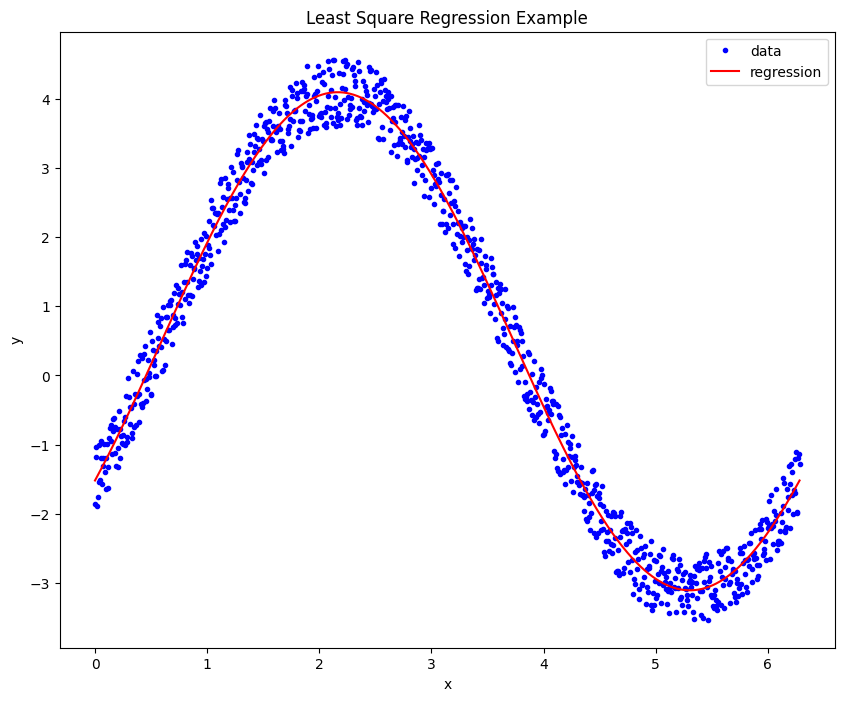

In [13]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 1000)
y = 3*np.sin(x) - 2*np.cos(x) + np.random.random(len(x))
f = [np.sin, np.cos]
beta = my_lin_regression(f, x, y)

plt.figure(figsize=(10, 8))
plt.plot(x, y, 'b.', label='data')
plt.plot(x, beta[0]*f[0](x) + beta[1]*f[1](x) + beta[2], 'r', label='regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Square Regression Example')
plt.legend()
plt.show()